In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from io import StringIO
import matplotlib.pyplot as plt


# Load data into DataFrame
df = pd.read_csv("qdataset_indep_2-50q.csv")

""" # Randomly select 50 qtasks
sample_df = df.sample(n=50, replace=True)

# Generate timestamps for a burst of tasks followed by normal arrival rate
burst_duration = timedelta(minutes=1)  # Sudden burst within 1 minute
burst_start_time = datetime.now()
normal_interval = timedelta(minutes=10)  # Normal rate: one task every 10 minutes

timestamps = []
current_time = burst_start_time

# Create a burst of tasks
for _ in range(40):  # First 40 tasks arrive within the burst duration
    timestamp = current_time + timedelta(seconds=random.uniform(0, burst_duration.total_seconds()))
    timestamps.append(timestamp.timestamp())
    current_time = timestamp

# Followed by a normal arrival rate
for _ in range(10):  # Next 10 tasks follow normal arrival rate
    current_time += normal_interval
    timestamps.append(current_time.timestamp())

# Add the timestamps to the DataFrame
sample_df['timestamp'] = timestamps
print(timestamps)
# Save the resulting DataFrame to a CSV file
#sample_df.to_csv('single_spikes_selected_qtasks.csv', index=False) """

" # Randomly select 50 qtasks\nsample_df = df.sample(n=50, replace=True)\n\n# Generate timestamps for a burst of tasks followed by normal arrival rate\nburst_duration = timedelta(minutes=1)  # Sudden burst within 1 minute\nburst_start_time = datetime.now()\nnormal_interval = timedelta(minutes=10)  # Normal rate: one task every 10 minutes\n\ntimestamps = []\ncurrent_time = burst_start_time\n\n# Create a burst of tasks\nfor _ in range(40):  # First 40 tasks arrive within the burst duration\n    timestamp = current_time + timedelta(seconds=random.uniform(0, burst_duration.total_seconds()))\n    timestamps.append(timestamp.timestamp())\n    current_time = timestamp\n\n# Followed by a normal arrival rate\nfor _ in range(10):  # Next 10 tasks follow normal arrival rate\n    current_time += normal_interval\n    timestamps.append(current_time.timestamp())\n\n# Add the timestamps to the DataFrame\nsample_df['timestamp'] = timestamps\nprint(timestamps)\n# Save the resulting DataFrame to a CSV fi

In [11]:
def AppendSingleSpikeTimestamp(df):
    sample_df = df.sample(n=50, replace=True)

    # Generate timestamps for a burst of tasks followed by normal arrival rate
    burst_duration = timedelta(minutes=1)  # Sudden burst within 1 minute
    burst_start_time = datetime.now()
    normal_interval = timedelta(minutes=10)  # Normal rate: one task every 10 minutes

    timestamps = []
    current_time = burst_start_time

    # Create a burst of tasks
    for _ in range(40):  # First 40 tasks arrive within the burst duration
        timestamp = current_time + timedelta(seconds=random.uniform(0, burst_duration.total_seconds()))
        timestamps.append(timestamp.timestamp())
        current_time = timestamp

    # Followed by a normal arrival rate
    for _ in range(10):  # Next 10 tasks follow normal arrival rate
        current_time += normal_interval
        timestamps.append(current_time.timestamp())

    # Add the timestamps to the DataFrame
    sample_df['timestamp'] = timestamps
    return sample_df

In [12]:
def AppendIntervalSpikeTimestamp(df):
    sample_df = df.sample(n=50, replace=True)

# Generate timestamps for regular intervals with spikes
    base_time = datetime.now()
    timestamps = []

# Parameters for regular intervals and spikes
    regular_interval = timedelta(minutes=10)
    spike_interval = timedelta(minutes=1)
    spike_duration = timedelta(minutes=5)
    spike_frequency = 15  # Every 15 tasks, simulate a spike

    current_time = base_time

    for i in range(50):
        if i % spike_frequency < spike_duration.total_seconds() / spike_interval.total_seconds():
            current_time += timedelta(seconds=random.uniform(0, spike_interval.total_seconds()))
        else:
            current_time += regular_interval

        timestamps.append(current_time.timestamp())

    # Add the timestamps to the DataFrame
    sample_df['timestamp'] = timestamps
    return sample_df

In [13]:
def AppendRandomSpikeTimestamp(df):
    sample_df = df.sample(n=50, replace=True)

    # Generate timestamps with random bursts
    base_time = datetime.now()
    timestamps = []

    # Parameters for generating random bursts
    regular_interval = timedelta(minutes=10)
    spike_duration = timedelta(minutes=5)
    max_tasks_in_spike = 10

    current_time = base_time

    for i in range(50):
        if random.random() < 0.2:  # 20% chance to start a burst
            for _ in range(random.randint(1, max_tasks_in_spike)):
                if len(timestamps) >= 50:
                    break
                timestamps.append(current_time.timestamp())
                current_time += timedelta(seconds=random.uniform(1, 60))  # Random interval between 1 to 60 seconds
        else:
            current_time += regular_interval
            timestamps.append(current_time.timestamp())

    # Ensure we have exactly 50 timestamps
    timestamps = timestamps[:50]

    # Add the timestamps to the DataFrame
    sample_df['timestamp'] = timestamps

    return sample_df


In [14]:
def AppendRampUpTimestamp(df):
    sample_df = df.sample(n=50, replace=True)

    # Generate timestamps with gradually increasing arrival rate (ramp-up)
    base_time = datetime.now()
    timestamps = []

    # Parameters for generating ramp-up timestamps
    initial_interval = timedelta(minutes=10)
    final_interval = timedelta(seconds=30)
    total_tasks = 50

    # Calculate the step decrease in interval for each task
    interval_step = (initial_interval - final_interval) / (total_tasks - 1)

    current_time = base_time
    for i in range(total_tasks):
        timestamps.append(current_time.timestamp())
        current_time += initial_interval - i * interval_step
    sample_df['timestamp'] = timestamps
    return sample_df


In [15]:
def AppendRampDownTimestamp(df):
    sample_df = df.sample(n=50, replace=True)

    # Generate timestamps with gradually decreasing arrival rate
    base_time = datetime.now()
    timestamps = []

    # Parameters for generating decreasing arrival rate timestamps
    initial_interval = timedelta(seconds=30)
    final_interval = timedelta(minutes=10)
    total_tasks = 50

    # Calculate the step increase in interval for each task
    interval_step = (final_interval - initial_interval) / (total_tasks - 1)

    current_time = base_time
    for i in range(total_tasks):
        timestamps.append(current_time.timestamp())
        current_time += initial_interval + i * interval_step

    # Add the timestamps to the DataFrame
    sample_df['timestamp'] = timestamps
    return sample_df

In [16]:
def DisplayChart(sample_df):
    sample_df['timestamp'] = pd.to_datetime(sample_df['timestamp'], unit='s')
    sample_df = sample_df.sort_values(by='timestamp')
    plt.figure(figsize=(12, 6))
    plt.plot(sample_df['timestamp'], range(len(sample_df)), marker='o', linestyle='-')
    plt.xlabel('Timestamp')
    plt.ylabel('Task Index')
    plt.title('Task Arrival Times')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


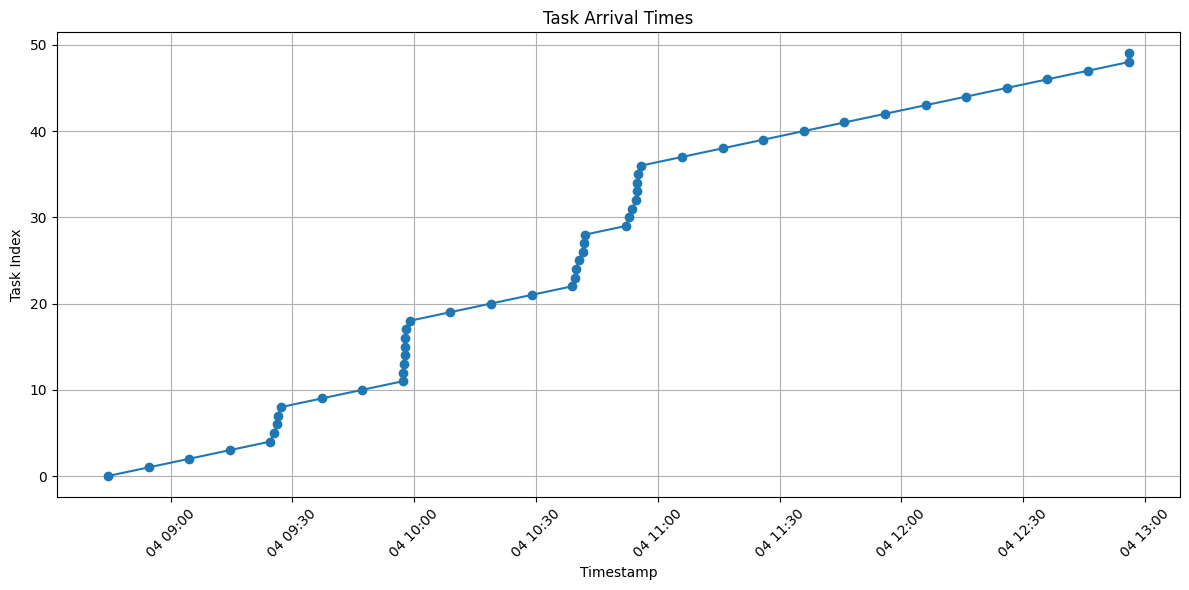

In [37]:
available_datasets = pd.read_csv("random_burst_dataset.csv")
DisplayChart(available_datasets)

In [22]:
low_activity_interval = timedelta(minutes=10)
print(low_activity_interval)

0:10:00


SINGLE SPIKE CONTEXT: a sudden burst of tasks arriving within a short timeframe, followed by a normal arrival rate.

In [65]:
single_spike_df = AppendSingleSpikeTimestamp(df)
single_spike_df.to_csv('single_spikes_selected_qtasks_1.csv', index=False)

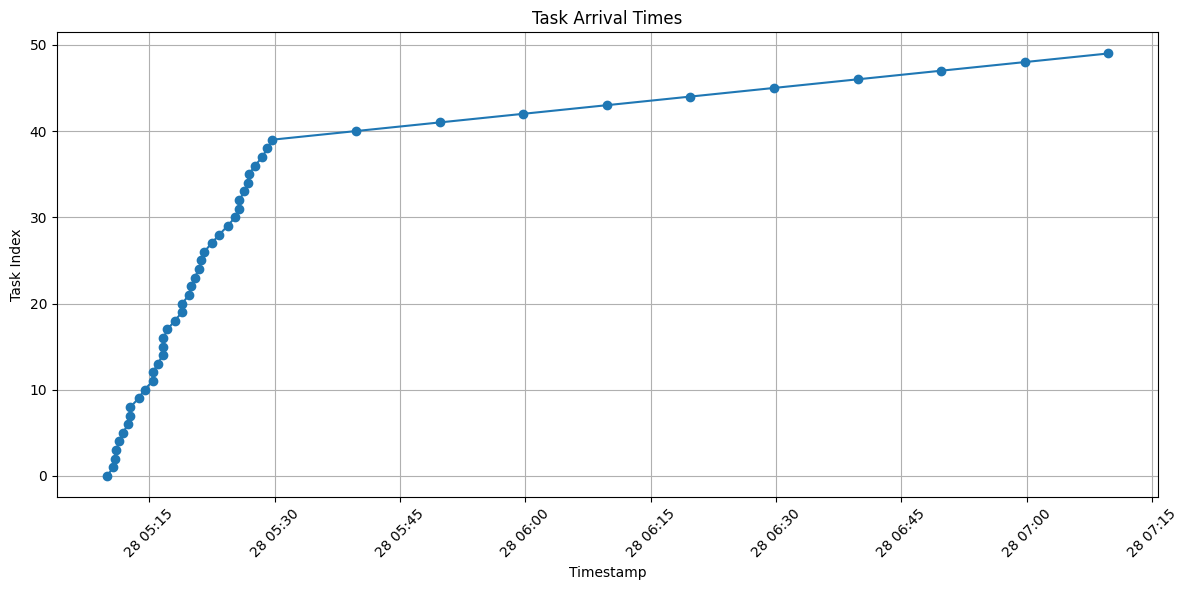

In [66]:
DisplayChart(single_spike_df)

INTERVAL SPIKE CONTEXT: regular intervals where task arrival rates spike for a specific duration.

In [67]:
interval_spike_df = AppendIntervalSpikeTimestamp(df)
interval_spike_df.to_csv('interval_spikes_selected_qtasks.csv', index=False)

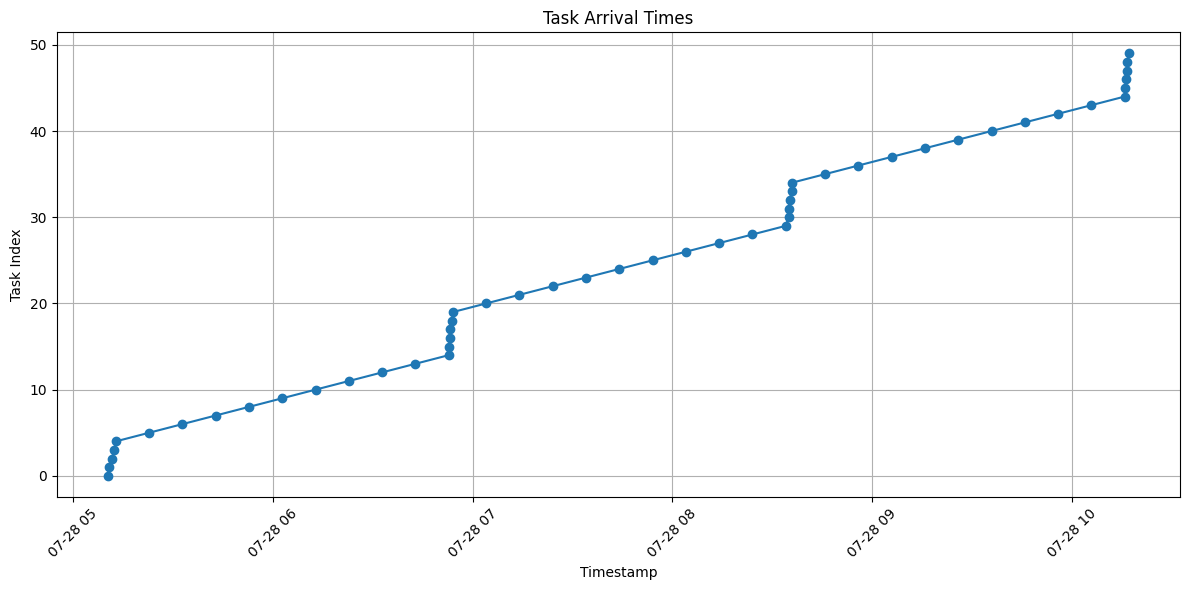

In [68]:
DisplayChart(interval_spike_df)

RANDOM SPIKES CONTEXT: random bursts of tasks at unpredictable intervals

In [69]:
random_spike_df = AppendRandomSpikeTimestamp(df)
random_spike_df.to_csv('random_spikes_selected_qtasks.csv', index=False)

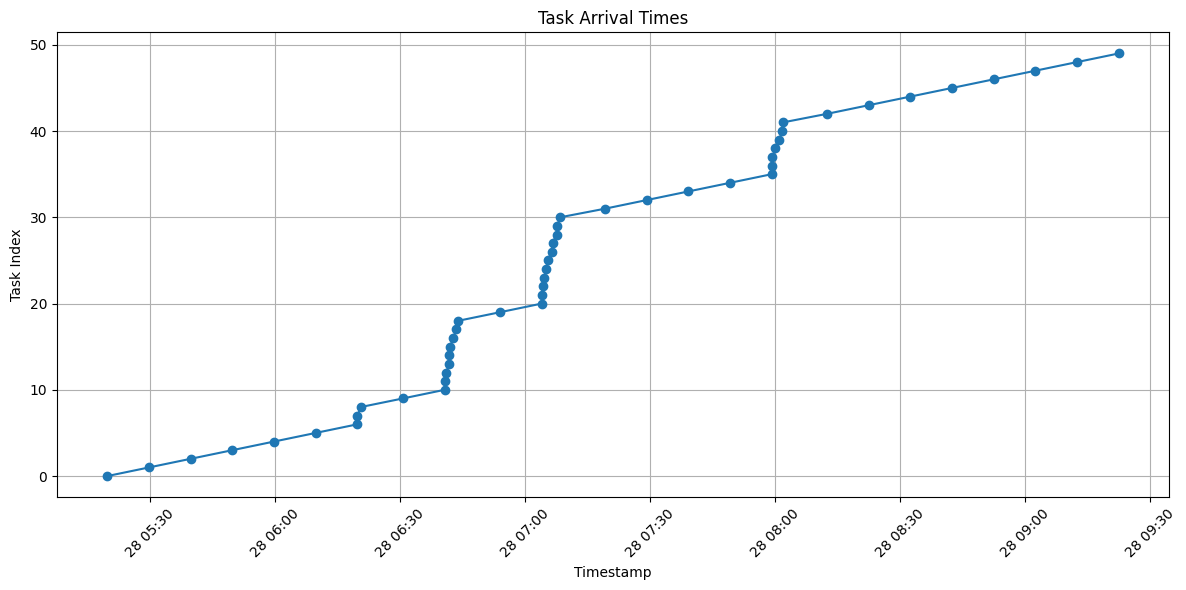

In [70]:
DisplayChart(random_spike_df)

RAMP UP CONTEXT: Gradually increase the arrival rate over a period

In [71]:
ramp_up_df = AppendRampUpTimestamp(df)
ramp_up_df.to_csv('Ramp_Up_selected_qtasks.csv', index=False)

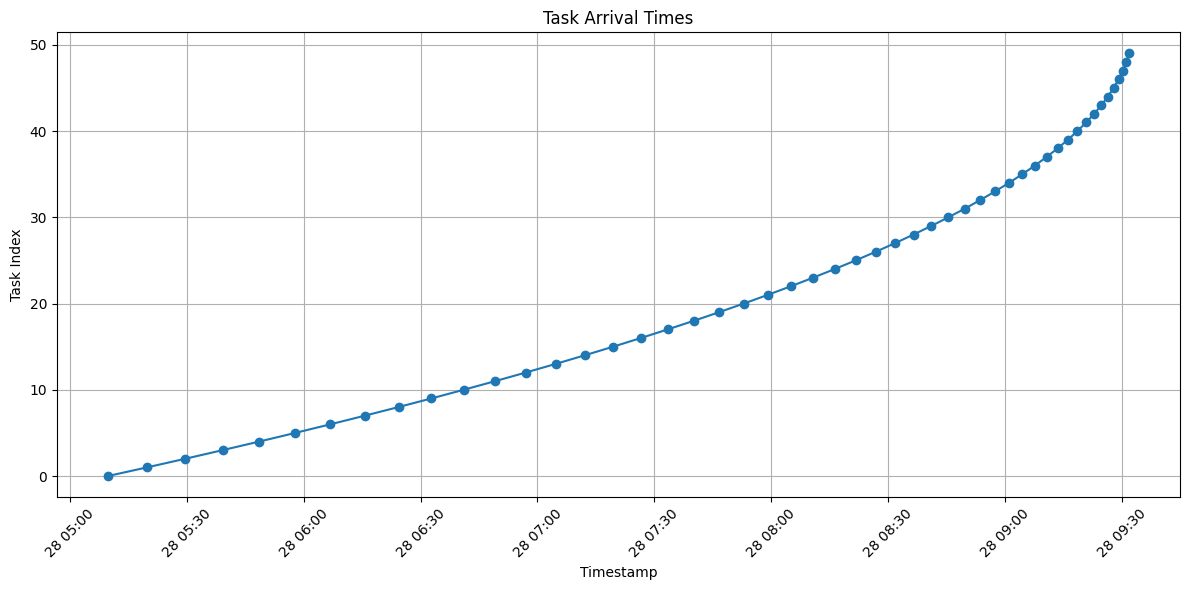

In [72]:
DisplayChart(ramp_up_df)

RAMP DOWN CONTEXT: Gradually decrease the arrival rate over a period.

In [73]:
ramp_down_df = AppendRampDownTimestamp(df)
ramp_down_df.to_csv('ramp_down_selected_tasks.csv', index=False)

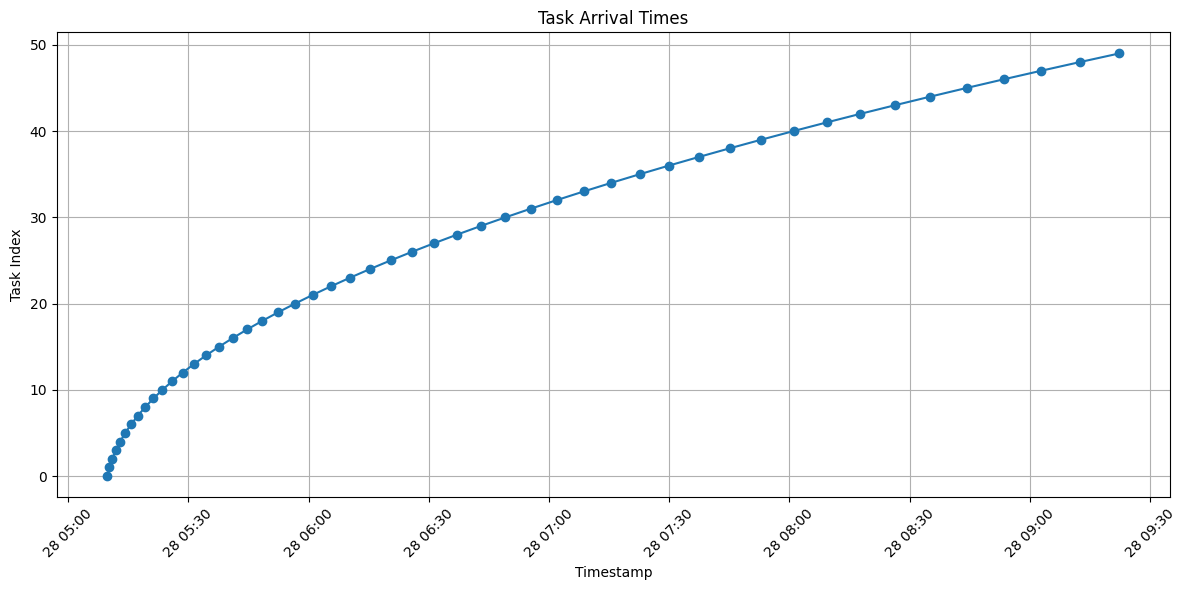

In [74]:
DisplayChart(ramp_down_df)